In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm
data = pd.read_csv('train.csv')
data.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0_0_4


# Exploring and Explaing the Data

In [4]:
df = data

df.describe(include="all")

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
count,5.237980e+06,5.237980e+06,5.237980e+06,5.237760e+06,5.237980e+06,5.237760e+06,5.237760e+06,2.343638e+06,2.380800e+06,5.237760e+06,5.237980e+06,5.237760e+06,5.237980e+06,5.237760e+06,5.237892e+06,5.237980e+06,5237980
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5237980
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0_0_0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,9.928856e+01,2.415100e+02,2.700000e+02,5.715293e+06,-1.189619e-02,9.999955e-01,4.510025e+07,1.001713e+00,9.996601e-01,9.997263e-01,5.181359e+04,1.000264e+00,5.357568e+04,9.999920e-01,-4.756125e-02,1.331005e+04,NaN
std,5.787176e+01,1.385319e+02,1.587451e+02,2.051591e+07,8.853374e-01,2.532497e-03,1.398413e+08,7.214705e-01,1.216920e-02,2.499345e-03,1.114214e+05,2.510042e-03,1.293554e+05,2.497509e-03,9.452860e+00,7.619271e+03,NaN
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,9.352850e-01,4.316610e+03,7.700000e-05,7.869880e-01,9.349150e-01,0.000000e+00,9.398270e-01,0.000000e+00,9.380080e-01,-3.852898e+02,0.000000e+00,NaN
25%,4.900000e+01,1.220000e+02,1.300000e+02,8.453415e+04,-1.000000e+00,9.987630e-01,5.279575e+06,9.963320e-01,9.971000e-01,9.985290e-01,7.374720e+03,9.990290e-01,7.823700e+03,9.987810e-01,-4.559755e+00,6.729000e+03,NaN
50%,9.900000e+01,2.420000e+02,2.700000e+02,1.113604e+06,0.000000e+00,9.999670e-01,1.288264e+07,9.998830e-01,9.998890e-01,9.997280e-01,2.196900e+04,1.000207e+00,2.301792e+04,9.999970e-01,-6.020069e-02,1.334500e+04,NaN
75%,1.490000e+02,3.610000e+02,4.100000e+02,4.190951e+06,1.000000e+00,1.001174e+00,3.270013e+07,1.003318e+00,1.002590e+00,1.000905e+00,5.583168e+04,1.001414e+00,5.787841e+04,1.001149e+00,4.409552e+00,1.990700e+04,NaN


- 48 days of Auction period data
- 0th bucket to 540th bucket (10 mins auction periods)
- 200 stocks (0 - 199)

In [ ]:
buy_sell_flag = df.imbalance_buy_sell_flag
ax = sns.countplot(buy_sell_flag,label="Count")       # M = 212, B = 357
B,N, S = buy_sell_flag.value_counts()
print('Number of BUY flags: ',B)
print('Number of Neturals:', N)
print('Number of SELL flags : ',S)

In [ ]:
features = ['seconds_in_bucket', 'imbalance_buy_sell_flag',
               'imbalance_size', 'matched_size', 'bid_size', 'ask_size',
                'reference_price','far_price', 'near_price', 'ask_price', 'bid_price', 'wap',
                'imb_s1', 'imb_s2'
               ]
    
df['imb_s1'] = df.eval('(bid_size-ask_size)/(bid_size+ask_size)')
df['imb_s2'] = df.eval('(imbalance_size-matched_size)/(matched_size+imbalance_size)')

prices = ['reference_price','far_price', 'near_price', 'ask_price', 'bid_price', 'wap']

for i,a in enumerate(prices):
    for j,b in enumerate(prices):
        if i>j:
            df[f'{a}_{b}_imb'] = df.eval(f'({a}-{b})/({a}+{b})')
            features.append(f'{a}_{b}_imb')    
                
for i,a in enumerate(prices):
    for j,b in enumerate(prices):
        for k,c in enumerate(prices):
            if i>j and j>k:
                max_ = df[[a,b,c]].max(axis=1)
                min_ = df[[a,b,c]].min(axis=1)
                mid_ = df[[a,b,c]].sum(axis=1)-min_-max_

                df[f'{a}_{b}_{c}_imb2'] = (max_-mid_)/(mid_-min_)
                features.append(f'{a}_{b}_{c}_imb2')


df.loc[df.date_id != 0 ].head(10)

## How Prices Change during the Auction Period for each Stock

In [ ]:
fig = plt.figure()


i,j = 0,0
x = df.query(f'stock_id =={i} & date_id =={j}')[['seconds_in_bucket','bid_price','ask_price', 'wap']].replace(0, np.nan).set_index('seconds_in_bucket')#.plot(title='Stock 0 on Day 0 - How the order book pricing changes during the auction')
fig.add_subplot(1,3,1)
plt.plot(x)


i,j = 0,12
x = df.query(f'stock_id =={i} & date_id =={j}')[['seconds_in_bucket','bid_price','ask_price', 'wap']].replace(0, np.nan).set_index('seconds_in_bucket')#.plot(title='Stock 0 on Day 0 - How the order book pricing changes during the auction')
fig.add_subplot(1,3,2)
plt.plot(x)

i,j = 0,48
x = df.query(f'stock_id =={i} & date_id =={j}')[['seconds_in_bucket','bid_price','ask_price', 'wap']].replace(0, np.nan).set_index('seconds_in_bucket')#.plot(title='Stock 0 on Day 0 - How the order book pricing changes during the auction')
fig.add_subplot(1,3,3)
plt.plot(x)

plt.title(f'Stock {i}  - How the order book pricing changes during the auction')
plt.legend(['seconds_in_bucket','bid_price','ask_price', 'wap'])
plt.show()

In [ ]:
x = df.query('stock_id ==0 & date_id ==0')[['seconds_in_bucket','near_price','far_price','reference_price']].replace(0, np.nan).set_index('seconds_in_bucket')#.plot(title = 'Stock 0 on Day 0 - How the auction & combined book pricing changes during the auction')


plt.plot(x)
plt.title('Stock 0 on Day 0 - How the auction & combined book pricing changes during the auction')
plt.legend(['near_price','far_price','reference_price'])
plt.show()



## What type of data missing?

There are 3 types of data missing in the world of Time Series:

Are there some time series are missing entirely (e.g., some stocks have no data at all on some days)?

Are some time series are missing their steps (e.g., some time series have steps less than 55)?

Both?

In [ ]:
(df
    .groupby(['stock_id', 'date_id'])
    ['seconds_in_bucket'] # Extract the column of interest
    .count() # Count the number of rows in each permutation of stock_id and date_id
    .apply(lambda x: x == 55) # Check if every count is 55
    .all() # Check if all the booleans are True
)

The above result suggests that all the time series in our training data are of the same length of 55.

Therefore, it can be concluded that there are some stocks missing data on some days entirely.

In [ ]:
df.near_price.describe(include='all')
df.groupby(['stock_id', 'date_id'])['near_price'].mean()

## Split Target and Features

In [ ]:
target = df.target
list = ['target']
x = df.drop(list,axis = 1)
x.head()

In [ ]:
x.columns

# Correlations

In [ ]:
sns.jointplot(x.imbalance_size, x.bid_price, kind="regg", color="#ce1414")

c:\Users\joshu\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1520: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
c:\Users\joshu\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1521: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
c:\Users\joshu\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:423: UserWarning: No contour levels were found within the data range.
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


KeyboardInterrupt: 

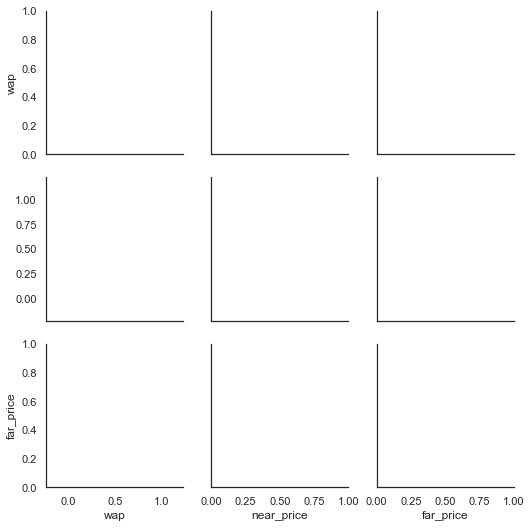

In [27]:
sns.set(style="white")
df = x.loc[:,['wap','near_price','far_price']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

# all 3 of these features are correlate

KeyboardInterrupt: 

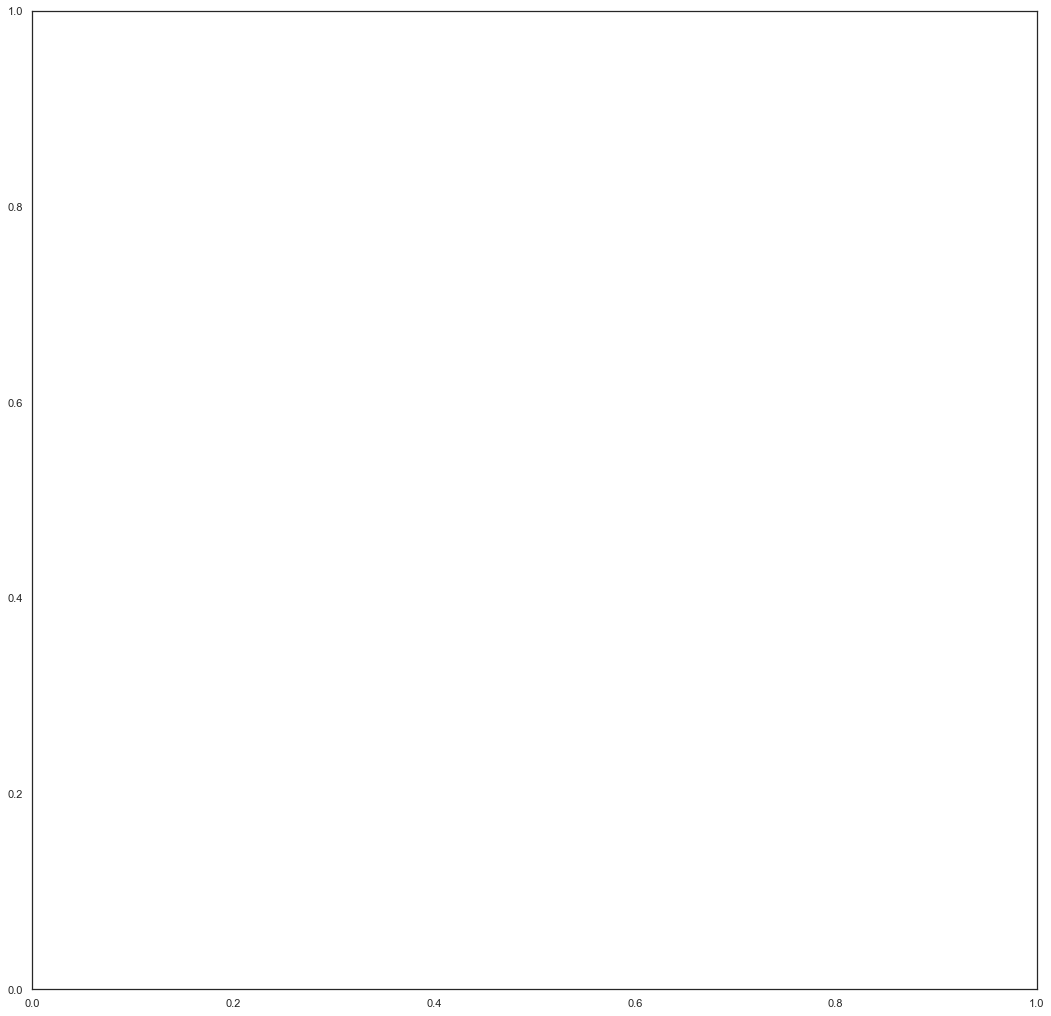

In [28]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


# Feature Selection

## Univariate Selection

In [29]:
# get top features helper function

def get_top(score_list, features_list,k):
    score_dict = {}
    for i in range(len(score_list)):

        score_dict[features_list[i]] = score_list[i]

    Z = sorted(score_dict.items(), key = lambda x : x[1], reverse= True)
    print(f'TOP {k} FEATURES',Z[:k])

In [32]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 % ON 
x_train, x_test, y_train, y_test = train_test_split(x, target, test_size=0.3, random_state=42)


#### Find best features

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
k = 7 # Top K features



"""
chi_2: It is used to test the independence between two categorical variables. In feature selection, it computes the chi-squared statistic between each feature and the target variable. Features that are highly correlated with the target variable will have higher scores.

mutual_info_classif: It is based on the concept of mutual information, which measures the amount of information shared between two variables. It computes the mutual information between each feature and the target variable. Features that are highly informative with respect to the target variable will have high scores.

f_classif: It is based on ANOVA (analysis of variance). It computes the F-value between each feature and the target variable, which measures the linear dependency between two variables. Features that are highly dependent on the target variable will have high scores.
"""

# Get the top values:
print("mutual_info_classif selection")
select_feature = SelectKBest(score_func= mutual_info_classif, k=k).fit(x_train, y_train)
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)
print(get_top(select_feature.scores_,x_train.columns, k ))

print("")

print("f_classif selection")
select_feature = SelectKBest(score_func = f_classif, k=k).fit(x_train, y_train)
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)


print(get_top(select_feature.scores_,x_train.columns, k ))

## RFECV
with Random Forest regressor


In [ ]:
from sklearn.feature_selection import RFECV # recursive feature elimination

# The "accuracy" scoring is proportional to the number of correct classifications
model = RandomForestClassifier() 
rfecv = RFECV(estimator=model, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_]) # .support_ again outputs True or false

In [ ]:
print(rfecv.grid_scores_
)
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# Selected Features

In [ ]:
selected_features = []

# LIGHTGBM

In [ ]:
# split the dataset into the training set and test set
from sklearn.model_selection import train_test_split

X_selected = x[selected_features]

X_train, X_test, y_train, y_test = train_test_split(X_selected, target, test_size = 0.3, random_state = 0)
# build the lightgbm model
import lightgbm as lgb
model = lgb.LGBMClassifier(n_jobs=12) # have to state the number of cores used
model.fit(X_train, y_train)

# predict the results
y_pred=model.predict(X_test)

Accuracy

In [ ]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy))
# Here, y_test are the true class labels and y_pred are the predicted class labels in the test-set.

MAE

In [ ]:
lightgbm_mae = (y_pred - target).abs().mean()
print(lightgbm_mae)

Classification Metrics

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# LightGBM Parameter Tuning 
